In [28]:
import pandas as pd
import graphlab as gl
import numpy as np
import os,glob
from __future__ import unicode_literals
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.spatial.distance import cosine
color = 'black'
mpl.rcParams['axes.labelcolor'] = color
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['xtick.color'] = color
mpl.rcParams['ytick.color'] = color
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['text.color'] = color
mpl.rcParams['text.usetex'] = False
mpl.rcParams['legend.fontsize'] = 'x-large'
#import seaborn

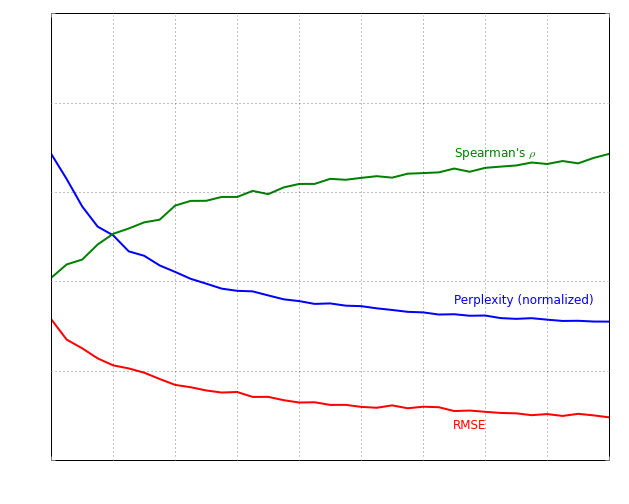

In [3]:
lda_stats = pd.read_table('../GenreModeling/eval_results/basic_lda_final.txt',sep=r"\s*",index_col='K',engine='python')
lda_stats['perplexity'] = lda_stats['perplexity']/lda_stats['perplexity'].max()
cols = [col for col in lda_stats.columns if ('euclidean' not in col) and ('jsd' not in col) and ('split' not in col)]
ax = lda_stats[cols].plot(legend=None,xlim=(20,200),lw=2)
ax.set_ylabel("Evaluation metric")
ax.set_xlabel("K (number of topics)")

handles,labels = ax.get_legend_handles_labels()
# l = ax.legend(handles,['Perplexity (normalized)',r"Spearman's $\rho$ (prev)",
#                        "RMSE (prev)",r"Spearman's $\rho$ (split)", "RMSE (split)"])
# for text in l.get_texts():
#     text.set_color("black")
ax.annotate('Perplexity (normalized)',(150,.35),color='blue',fontsize='large')
ax.annotate(r"Spearman's $\rho$",(150,.68),color='green',fontsize='large')
#ax.annotate(r"Spearman's $\rho$ (split)",(150,.57),color=(0,191/255.,191/255.),fontsize='large')
ax.annotate("RMSE",(150,.07),color='red',fontsize='large')
#ax.annotate("RMSE (split)",(162,.13),color=(192/255.,0,192/255.),fontsize='large')
ax.grid()

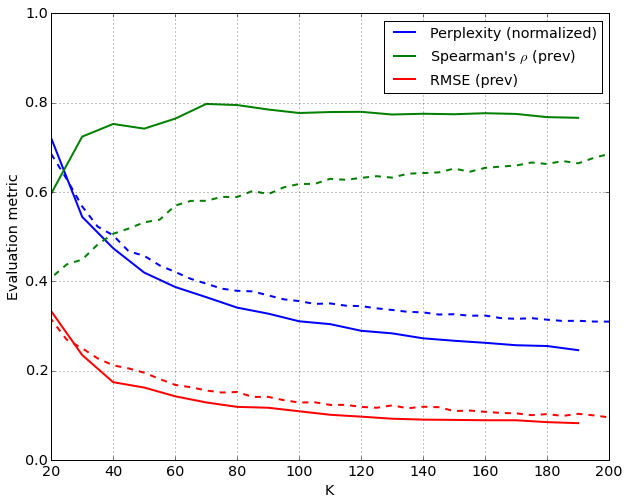

In [6]:
lda_stats_2 = pd.read_table('../GenreModeling/eval_results/artist_lda_final.txt',sep=r"\s*",index_col='K',engine='python')
lda_stats_2['perplexity'] = lda_stats_2['perplexity']/lda_stats_2['perplexity'].max()
cols = [col for col in lda_stats_2.columns if ('euclidean' not in col) and ('jsd' not in col) and ('split' not in col)]
ax = lda_stats_2[cols].plot(legend=None,xlim=(20,200),lw=2)
ax.set_ylabel("Evaluation metric")
ax.set_xlabel("K (number of topics)")

lda_stats[cols].plot(legend=None,xlim=(20,200),lw=2,ax=ax,ls='--',color=['blue','green','red'])

handles,labels = ax.get_legend_handles_labels()
l = ax.legend(handles,['Perplexity (normalized)',r"Spearman's $\rho$ (prev)",
                       "RMSE (prev)"])#,r"Spearman's $\rho$ (split)", "RMSE (split)"])
for text in l.get_texts():
    text.set_color("black")
ax.grid()

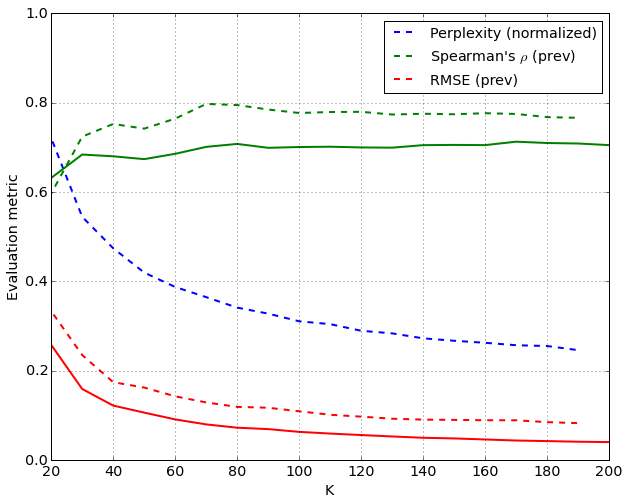

In [93]:
mf_stats = pd.read_table('../GenreModeling/eval_results/basic_mf_final.txt',sep=r"\s*",index_col='K',engine='python')
ax = lda_stats_2[cols].plot(legend=None,xlim=(20,200),lw=2,ls='--')
ax.set_ylabel("Evaluation metric")
ax.set_xlabel("K (number of factrs)")

mf_stats.plot(legend=None,xlim=(20,200),lw=2,ax=ax,ls='-',color=['green','red'])

handles,labels = ax.get_legend_handles_labels()
l = ax.legend(handles,['Perplexity (normalized)',r"Spearman's $\rho$ (prev)",
                       "RMSE (prev)"])#,r"Spearman's $\rho$ (split)", "RMSE (split)"])
for text in l.get_texts():
    text.set_color("black")
ax.grid()

In [32]:
lda_summary = pd.read_table('../GenreModeling/eval_results/knn_lda.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
mf_summary = pd.read_table('../GenreModeling/eval_results/knn_mf.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
nmf_summary = pd.read_table('../GenreModeling/eval_results/knn_nmf.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])
lda_summary_artists = pd.read_table('../GenreModeling/eval_results/knn_lda_artists.txt',sep=r"\s*",
                            engine='python',index_col=['k','source','method','topN'])

In [34]:
if False:
    for d in [lda_summary,mf_summary,lda_summary_artists]:
        fig,axes = plt.subplots(2,3,figsize=(14,8))
        flat = axes.flat
        for l in ['all','possible','25','50','100','150']:
            data=d.xs(['fm',l],level=['source','method'])['median'].unstack()
            if len(data)>0:
                ax = flat.next()
                data.plot(title=l,ax=ax,ylim=[0,.5],lw=2,)
                l = ax.get_legend()
                for text in l.get_texts():
                    text.set_color("black")
                t = l.get_title()
                t.set_text("KNN")
                t.set_color("black")
                t.set_fontsize("x-large")
                ax.grid()
                ax.set_ylabel("Median proportion overlap")
                ax.set_xlabel("K (number of topics)")

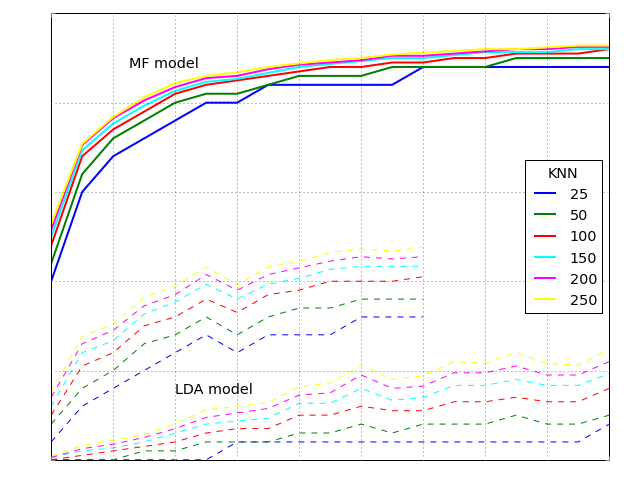

In [35]:
ax=mf_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median').plot(ylim=(0,1),lw=2,color=['blue','green','red','cyan','magenta','yellow'])
ax.set_ylabel("Median proportion overlap")
ax.grid(which='both')
ax.set_xlim(20,200)

lda_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median').plot(ylim=(0,1),lw=1,legend=False,ls='--',ax=ax,color=['blue','green','red','cyan','magenta','yellow'])

nmf_summary.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median').plot(ylim=(0,1),lw=1,legend=False,ls='--',ax=ax,color=['blue','green','red','cyan','magenta','yellow'])
l = ax.get_legend()
for text in l.get_texts():
    text.set_color("black")
t = l.get_title()
t.set_text("KNN")
t.set_color("black")
t.set_fontsize("x-large")
ax.annotate("MF model",(45,0.88),color='k',fontsize='x-large')
ax.annotate("LDA model",(60,0.15),color='k',fontsize='x-large')
ax.set_xlabel("K (number of latent factors/topics)")
ax.grid()

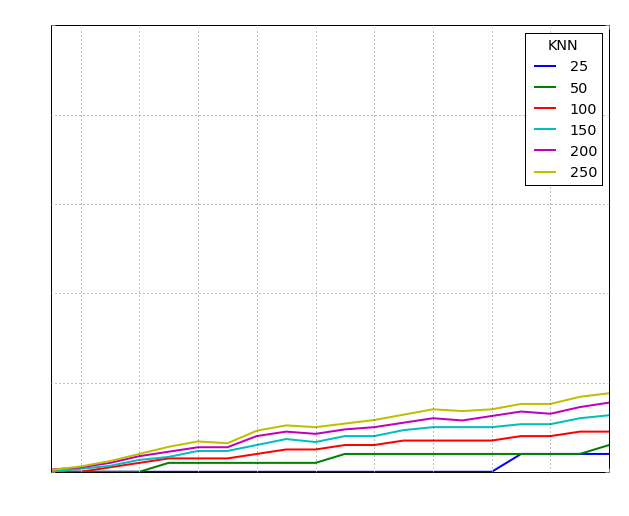

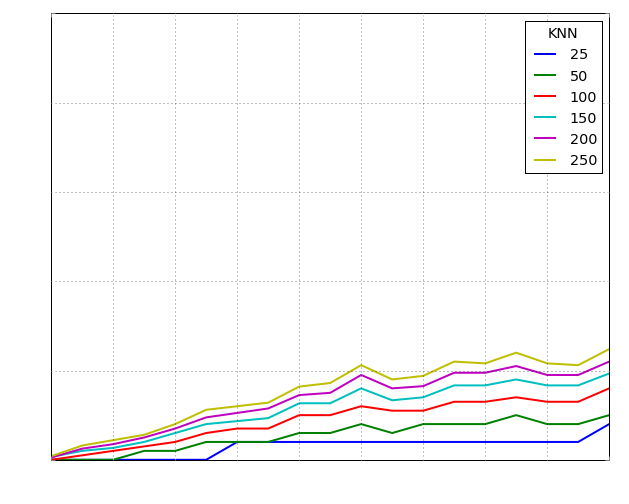

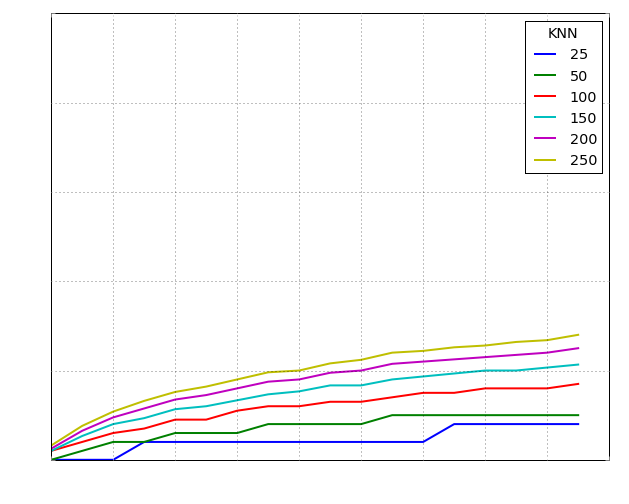

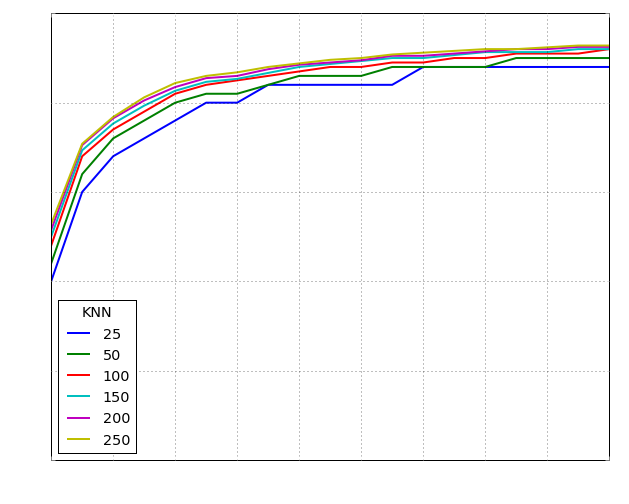

In [6]:
ax = lda_summary.xs('split',level='source').reset_index().pivot(index='k',
                        columns='topN',values='median').plot(ylim=(0,1),lw=2)
l = ax.get_legend()
for text in l.get_texts():
    text.set_color("black")
t = l.get_title()
t.set_text("KNN")
t.set_color("black")
t.set_fontsize("x-large")
ax.set_ylabel("Median proportion overlap")
ax.set_xlabel("K (number of topics)")
ax.set_title('"split" method')
ax.set_xticks(np.arange(20,201,20))
ax.grid(which='both')

for i,d in enumerate((lda_summary,lda_summary_artists,mf_summary)):
    ax=d.xs('prev',level='source').reset_index().pivot(index='k',columns='topN',values='median').plot(ylim=(0,1),lw=2)
    l = ax.get_legend()
    for text in l.get_texts():
        text.set_color("black")
    t = l.get_title()
    t.set_text("KNN")
    t.set_color("black")
    t.set_fontsize("x-large")
    ax.set_ylabel("Median proportion overlap")
    if i ==2:
        ax.set_xlabel("K (number of latent factors)")
    else:
        ax.set_xlabel("K (number of topics)")
#    ax.set_title('"prev" method')
    ax.grid(which='both')
    ax.set_xlim(20,200)

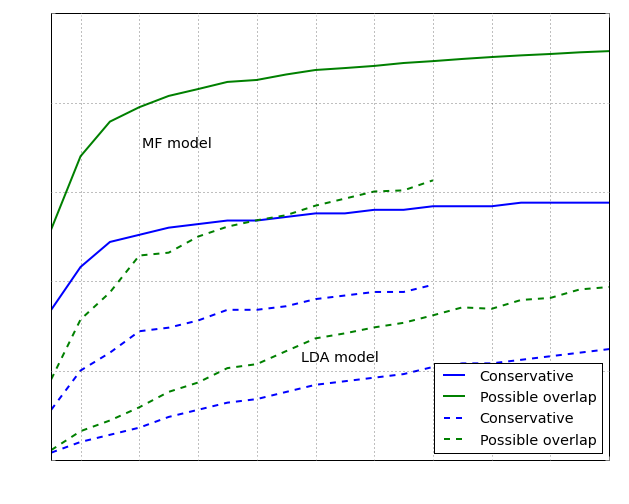

In [36]:
fig,ax = plt.subplots(1,1)
lda_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                ax=ax,lw=2,label='Conservative',ls='--',c='blue')
lda_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                ax=ax,lw=2,label='Possible overlap',ls='--',c='green')

# lda_summary_artists.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median'].plot(
#                                                                 ax=ax,lw=2,label='Conservative',c='blue')
# lda_summary_artists.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median'].plot(
#                                                                 ax=ax,lw=2,label='Possible overlap',c='green')

mf_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Conservative',color='blue')
mf_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Possible overlap',color='green')

nmf_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Conservative',color='blue',ls='--')
nmf_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Possible overlap',color='green',ls='--')


ax.set_ylim(0,0.5)
handles,labels = ax.get_legend_handles_labels()
l = ax.legend(handles[2:],labels[2:],loc='lower right')

for text in l.get_texts():
    text.set_color("black")
ax.set_xticks(np.arange(20,201,20))
ax.grid()
ax.set_xlabel("K (number of latent factors/topics)")
ax.set_ylabel("Median proportion overlap")

ax.annotate("LDA model",(95,0.11),color='k',fontsize='x-large')
ax.annotate("MF model",(41,0.35),color='k',fontsize='x-large')


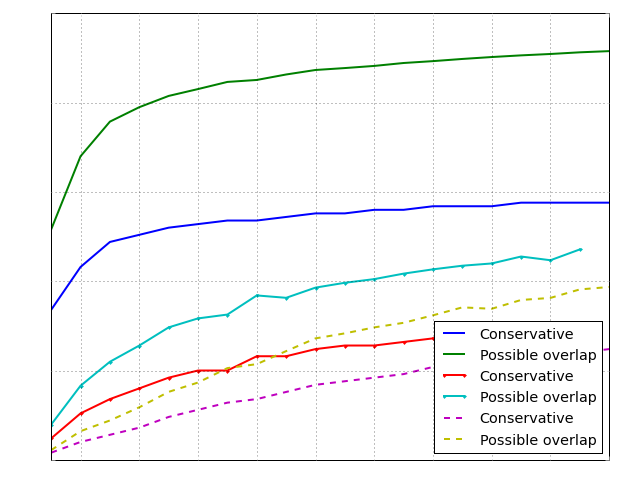

In [12]:
fig,ax = plt.subplots(1,1)
mf_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Conservative')
mf_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Possible overlap')

lda_summary_artists.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Conservative',marker='.')
lda_summary_artists.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Possible overlap',marker='.')

lda_summary.xs(['fm','all'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Conservative',ls='--')
lda_summary.xs(['fm','possible'],level=['source','method']).reset_index().set_index('k')['median'].plot(
                                                                            ax=ax,lw=2,label='Possible overlap',ls='--')


ax.set_ylim(0,0.5)
l = ax.legend(loc='lower right')
for text in l.get_texts():
    text.set_color("black")
ax.set_xticks(np.arange(20,201,20))
ax.grid()
ax.set_xlabel("K (number of topics)")
ax.set_ylabel("Median proportion overlap")

In [360]:
artist_data = pd.read_table('../GenreModeling/data/artist_data',header=None,
                            names=['artist_id','artist_name','scrobbles','listeners'])

In [5]:
artist_data.head()

,artist_id,artist_name,scrobbles,listeners
0,1,slipknot,5168441,45909
1,5,ultraspank,21797,1262
2,7,finger+eleven,452415,17830
3,10,strata,87516,3022
4,12,%c3%9cnloco,71511,6095


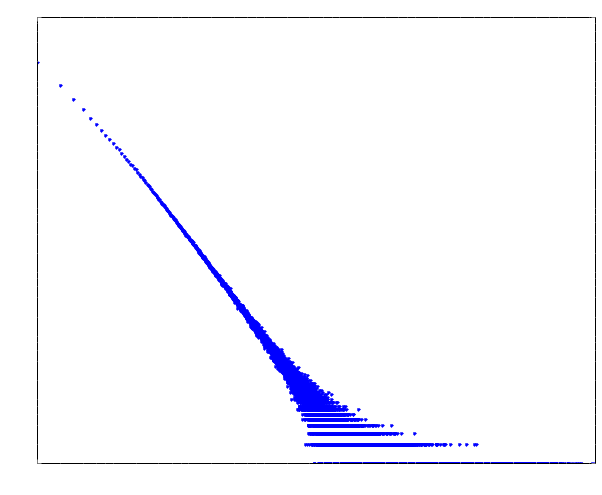

In [361]:
artist_data['scrobbles'].value_counts().sort_index().plot(marker='.',
                                                          ls='',loglog=True,label='Total scrobbles')
artist_data['listeners'].value_counts().sort_index().plot(marker='.',
                                                          ls='',loglog=True,ax=ax,label='Total unique listeners')
ax.set_xlabel('Total scrobbles/listeners')
ax.set_ylabel('Number of artists')
#ax.axvline(100,c='green',ls='--')
#ax.axvline(1000,c='blue',ls='--')
ax.set_title(r"\textbf{Artist} listener and scrobble frequency distributions")
l = ax.legend()
for text in l.get_texts():
    text.set_color("black")
ax.grid()  

In [17]:
playcounts = pd.Series([int(line.strip()) for line in open('../GenreModeling/data/playcounts')])
playcounts.sort(ascending=False)
playcounts = playcounts.reset_index(drop=True)

In [39]:
playcounts[(playcounts<=200000)&(playcounts>=1000)].sum()

4419137882

839 704112


(4448500478, 4691766834)

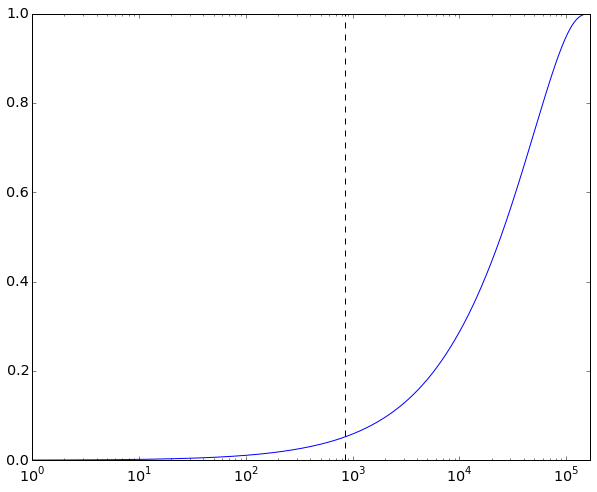

In [33]:
cumprop = ((playcounts/float(playcounts.sum())).cumsum())
med = cumprop[cumprop<=0.5].index[-1]
head_mid = int(round(med**(2./3)))
mid_tail = int(round(med**(4./3)))
print head_mid,mid_tail
ax = cumprop.plot(logx=True)
ax.axvline(head_mid,c='k',ls='--')
ax.axvline(mid_tail,c='k',ls='--')
playcounts[head_mid:].sum(),playcounts.sum()


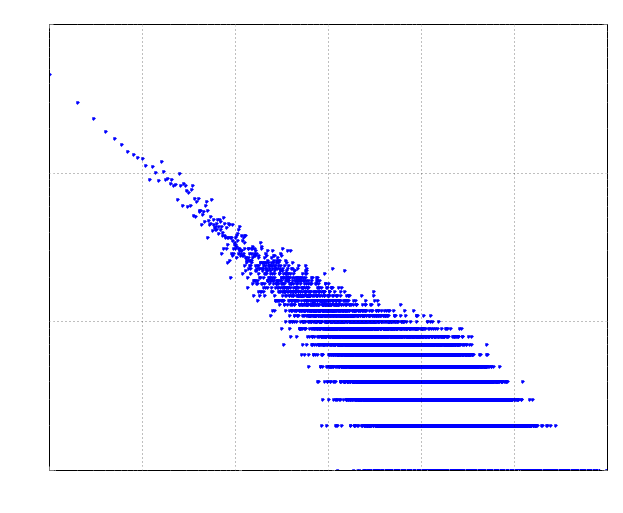

In [46]:
ax = playcounts.value_counts().sort_index().plot(marker='.',ls='',loglog=True)
ax.set_xlabel('Total scrobbles')
ax.set_ylabel('Number of users')
ax.set_title(r"\textbf{User} scrobble frequency distribution")
ax.grid()

In [4]:
#mpl.rcParams

In [95]:
artist_data_trimmmed = artist_data[(artist_data['scrobbles']>=1000)&(artist_data['listeners']>=100)]
print len(artist_data),len(artist_data_trimmmed),float(len(artist_data_trimmmed))/len(artist_data)
print artist_data['scrobbles'].sum(),artist_data_trimmmed['scrobbles'].sum(),4430237213./4691766834

7333724 112312 0.0153144568844
4691766834 4430237213 0.944257754008


4684838731

In [14]:
import graphlab as gl
#docs = gl.SArray("../GenreModeling/data/doc_array/")

A newer version of GraphLab Create (v1.8.4) is available! Your current version is v1.5.2.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [102]:
#doc_sums = docs.apply(lambda x: sum(x.values()))
4423111456.0 / 4691766834

0.9427389749948516

In [103]:
print len(docs),len(playcounts)

145148 167244


In [49]:
topic_model = gl.load_model('../testData/lda_model_100/')
TOP_TERMS=20
top_terms_by_topic = topic_model.get_topics(num_words=TOP_TERMS,output_type='topic_probabilities').to_dataframe()
top_terms_by_topic['Rank'] = (-1*top_terms_by_topic).groupby('topic')['score'].transform(np.argsort)
top_terms_by_topic['New_str'] = top_terms_by_topic['word'] + top_terms_by_topic['score'].apply(' ({0:.3f})'.format)
new = top_terms_by_topic.sort(columns=['Rank', 'score'])[['New_str', 'topic','Rank']]
final = new.pivot(index='Rank', values='New_str', columns='topic')

In [94]:
from urllib import unquote_plus
for idx in range(100):
    break
    print ', '.join([unquote_plus(a).title() for a in list(final[idx][:5])])

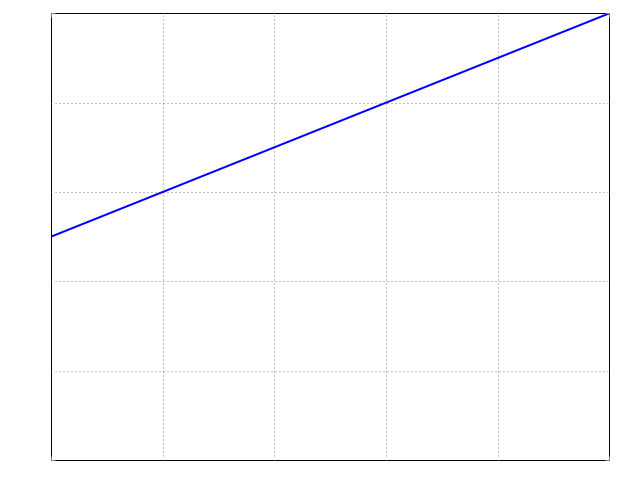

In [404]:
x = np.arange(0,1.1,0.1)
fig,ax = plt.subplots(1,1)
ax.plot(0.5+0.5*x,lw=2)
ax.set_xlabel("|dist(A,B) - dist(A,C)|")
ax.set_ylabel("Proportion human/model agreement")
ax.set_ylim(0,1)
ax.set_xticklabels(np.arange(0,1.01,0.2))
ax.grid(which='both')
#ax.set_yticklabels(np.arange(0,1.01,0.1))

Chris H         391
rib             326
adireuveny      300
Michelle Xie    269
jared           246
gerj            107
snordli          75
MGalang          60
Emily Exline     55
dtype: int64
 1    1028
 0     551
 2     170
-1      80
dtype: int64
50
130
90


/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:67: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


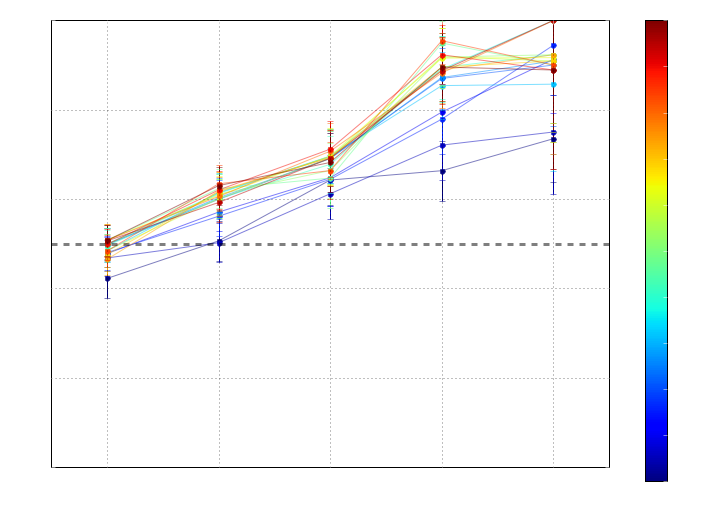

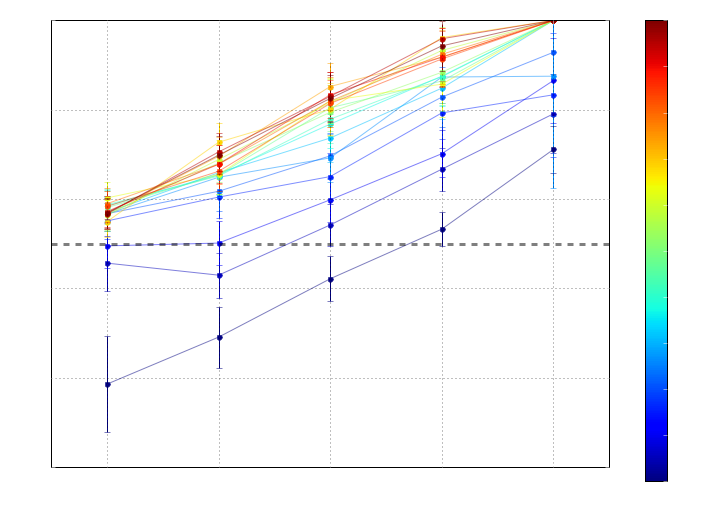

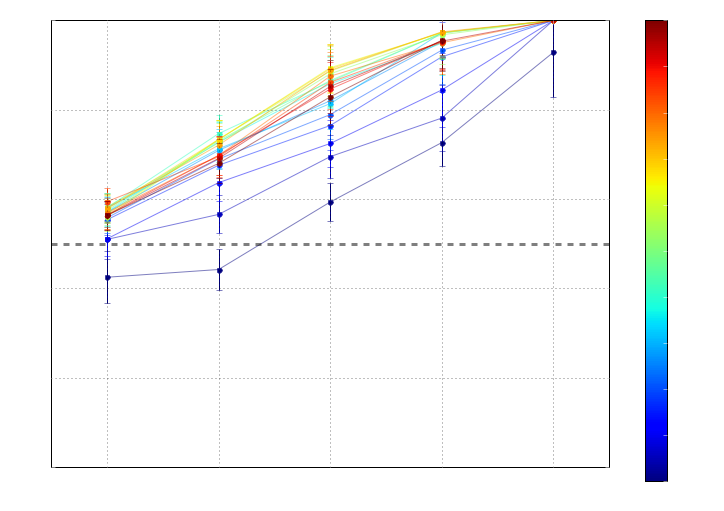

In [28]:
files = glob.glob('../GenreModeling/manual_eval/results/*_log')
artist_ids = {}
with open('../GenreModeling/data/vocab_idx') as fin:
    for line in fin:
        line = line.strip().split()
        artist_ids[int(line[1])] = line[0]
df_list = []
for f in files:
    df = pd.read_table(f,header=None,names=['ts','artist_a','artist_b','artist_c','ab_dist','bc_dist','agree'])
    iden = f.split('/')[-1].split('_')[0]
    df['iden'] = iden
    df_list.append(df)
eval_data = pd.concat(df_list).drop_duplicates()
print eval_data['iden'].value_counts()
print eval_data['agree'].value_counts()
eval_data = eval_data[eval_data['agree']!=-1]
eval_data['artist_name_a'] = eval_data.apply(lambda row: artist_ids.get(row['artist_a']),axis=1)
eval_data['artist_name_b'] = eval_data.apply(lambda row: artist_ids.get(row['artist_b']),axis=1)
eval_data['artist_name_c'] = eval_data.apply(lambda row: artist_ids.get(row['artist_c']),axis=1)
eval_data['agree'] = eval_data['agree'].apply(lambda x: 0.5 if x==2 else x)
def response_parse(row):
    if row['agree'] == 0.5:
        return '='
    else:
        if (row['ab_dist']>row['bc_dist']):
            if row['agree']==1.:
                response = 'c'
            elif row['agree'] == 0.:
                response = 'b'
        elif (row['ab_dist']<row['bc_dist']):
            if row['agree']==1.:
                response = 'b'
            elif row['agree'] == 0.:
                response = 'c'
    return response

def agree_parse(row):
    if row['agree'] == '=':
        return 0.5
    else:
        if (row['ab_dist']>row['bc_dist']):
            if row['response']=='c':
                return 1
            elif row['response'] == 'b':
                return 0
        elif (row['ab_dist']<row['bc_dist']):
            if row['response']=='b':
                return 1
            elif row['response'] == 'c':
                return 0
            
eval_data['response'] = eval_data.apply(response_parse,axis=1)

best = 0
#fig,axes = plt.subplots(1,3,figsize=(24,6))
for ax_idx,d in enumerate(('lda_users','lda_artists','mf')):
    fig,ax = plt.subplots(1,1)
    best = 0.
    best_k = None
    jet = cm = plt.get_cmap('jet') 
    cNorm  = colors.Normalize(vmin=0, vmax=19)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    for i,k in enumerate(np.arange(10,201,10)):
        colorVal = scalarMap.to_rgba(i)
        artist_features = np.load("../GenreModeling/data/features/{}/features_{}.npy".format(d,k))
        def calc_dist(artist_a,artist_b):
            return cosine(artist_features[artist_a],artist_features[artist_b])

        eval_data['ab_dist'] = eval_data.apply(lambda row: calc_dist(row['artist_a'],row['artist_b']),axis=1)
        eval_data['ab_dist'] = eval_data.apply(lambda row: calc_dist(row['artist_a'],row['artist_b']),axis=1)
        eval_data['dist_dif'] = np.clip(np.abs(eval_data['ab_dist']-eval_data['bc_dist']),0,1)
        eval_data['agree'] = eval_data.apply(agree_parse,axis=1)
        n_bins = 5
        bins = np.arange(0,1.01,1./n_bins)
        result = eval_data.groupby(np.digitize(eval_data['dist_dif'],bins,right=True))['agree'].describe().unstack()
        se = 2*(result['std']/np.sqrt(result['count']))
        #ax = axes[ax_idx]
        result['mean'].plot(ls='-',alpha=0.5,color=colorVal,label=str(k),ax=ax)
        result['mean'].plot(ls='',marker='.',ms=10,ax=ax,yerr=se,color=colorVal)
        overall_mean = eval_data['agree'].mean()
        if overall_mean>best:
            best = overall_mean
            best_k = k
    print best_k        
    ax.axhline(0.5,ls='--',alpha=0.5,c='k',lw=3)
    ax.set_ylim(0,1.)
    ax.set_xlim(0.5,n_bins+0.5)
    ax.set_xticks(np.arange(1,len(bins)))
    ax.set_xticklabels(bins[1:])
    ax.set_xlabel("|dist(A,B) - dist(A,C)| (right-hand bin boundary)")
    ax.set_ylabel("Proportion human/model agreement")
    ax.grid()
    ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
    cb = mpl.colorbar.ColorbarBase(ax=ax2,cmap=jet)
    ax2.set_yticklabels(np.arange(0,201,20),rotation=45)
    if d == 'mf':
        cb.set_label("K (number of latent factors)")
    else:
        cb.set_label("K (number of topics)")
    #handles,labels = ax.get_legend_handles_labels()
    #ax.legend(handles[:20],labels[:20]);




In [75]:
files = glob.glob('../GenreModeling/manual_eval/results/*_log')
artist_ids = {}
with open('../GenreModeling/data/vocab_idx') as fin:
    for line in fin:
        line = line.strip().split()
        artist_ids[int(line[1])] = line[0]
df_list = []
for f in files:
    df = pd.read_table(f,header=None,names=['ts','artist_a','artist_b','artist_c','ab_dist','bc_dist','agree'])
    iden = f.split('/')[-1].split('_')[0]
    df['iden'] = iden
    df_list.append(df)
eval_data = pd.concat(df_list).drop_duplicates()
print eval_data['iden'].value_counts()
print eval_data['agree'].value_counts()
eval_data = eval_data[eval_data['agree']!=-1]
eval_data['artist_name_a'] = eval_data.apply(lambda row: artist_ids.get(row['artist_a']),axis=1)
eval_data['artist_name_b'] = eval_data.apply(lambda row: artist_ids.get(row['artist_b']),axis=1)
eval_data['artist_name_c'] = eval_data.apply(lambda row: artist_ids.get(row['artist_c']),axis=1)
eval_data['agree'] = eval_data['agree'].apply(lambda x: 0.5 if x==2 else x)
def response_parse(row):
    if row['agree'] == 0.5:
        return '='
    else:
        if (row['ab_dist']>row['bc_dist']):
            if row['agree']==1.:
                response = 'c'
            elif row['agree'] == 0.:
                response = 'b'
        elif (row['ab_dist']<row['bc_dist']):
            if row['agree']==1.:
                response = 'b'
            elif row['agree'] == 0.:
                response = 'c'
    return response

def agree_parse(row):
    if row['agree'] == '=':
        return 0.5
    else:
        if (row['ab_dist']>row['bc_dist']):
            if row['response']=='c':
                return 1
            elif row['response'] == 'b':
                return 0
        elif (row['ab_dist']<row['bc_dist']):
            if row['response']=='b':
                return 1
            elif row['response'] == 'c':
                return 0
            
eval_data['response'] = eval_data.apply(response_parse,axis=1)

if False:

    best = 0
    #fig,axes = plt.subplots(1,3,figsize=(24,6))
    fig,ax = plt.subplots(1,1)
    for ax_idx,d in enumerate(('mf','lda_users')):
        best = 0.
        best_k = None
        jet = cm = plt.get_cmap('jet') 
        cNorm  = colors.Normalize(vmin=0, vmax=19)
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

        for i,k in enumerate(np.arange(50,201,10)):
            colorVal = scalarMap.to_rgba(i)
            artist_features = np.load("../GenreModeling/data/features/{}/features_{}.npy".format(d,k))
            def calc_dist(artist_a,artist_b):
                return cosine(artist_features[artist_a],artist_features[artist_b])

            eval_data['ab_dist'] = eval_data.apply(lambda row: calc_dist(row['artist_a'],row['artist_b']),axis=1)
            eval_data['ab_dist'] = eval_data.apply(lambda row: calc_dist(row['artist_a'],row['artist_b']),axis=1)
            eval_data['dist_dif'] = np.clip(np.abs(eval_data['ab_dist']-eval_data['bc_dist']),0,1)
            eval_data['agree'] = eval_data.apply(agree_parse,axis=1)
            #print k,eval_data['agree'].mean()
            n_bins = 5
            bins = np.arange(0,1.01,1./n_bins)
            result = eval_data.groupby(np.digitize(eval_data['dist_dif'],bins,right=True))['agree'].describe().unstack()
            se = 2*(result['std']/np.sqrt(result['count']))
            #ax = axes[ax_idx]
            if d =='lda_users':
                ls = '--'
            else:
                ls ='-'
            result['mean'].plot(ls=ls,alpha=0.5,color=colorVal,label=str(k),ax=ax)
            result['mean'].plot(ls='',marker='.',ms=10,ax=ax,yerr=se,color=colorVal)


    ax.axhline(0.5,ls='--',alpha=0.5,c='k',lw=3)
    ax.set_ylim(0,1.)
    ax.set_xlim(0.5,n_bins+0.5)
    ax.set_xticks(np.arange(1,len(bins)))
    ax.set_xticklabels(bins[1:])
    ax.set_xlabel("|dist(A,B) - dist(B,C)| (right-hand bin boundary)")
    ax.set_ylabel("Proportion human/model agreement")
    ax.grid()
    ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
    cb = mpl.colorbar.ColorbarBase(ax=ax2,cmap=jet)
    ax2.set_yticklabels(np.arange(0,201,20),rotation=45)
    cb.set_label("K (number of latent factors/topics)")
    ax.annotate("LDA model",(2.3,0.55),color='k',fontsize='x-large')
    ax.annotate("MF model",(1.6,0.85),color='k',fontsize='x-large')

    #handles,labels = ax.get_legend_handles_labels()
    #ax.legend(handles[:20],labels[:20]);




Chris H         391
rib             326
adireuveny      300
Michelle Xie    269
jared           246
gerj            107
snordli          75
MGalang          60
Emily Exline     55
dtype: int64
 1    1028
 0     551
 2     170
-1      80
dtype: int64


In [76]:
eval_data.shape,eval_data['iden'].unique()

((1749, 12),
 array([u'adireuveny', u'Chris H', u'Emily Exline', u'gerj', u'jared',
        u'MGalang', u'Michelle Xie', u'rib', u'snordli'], dtype=object))

In [38]:
import seaborn

/Users/jaredlorince/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(0, 1)

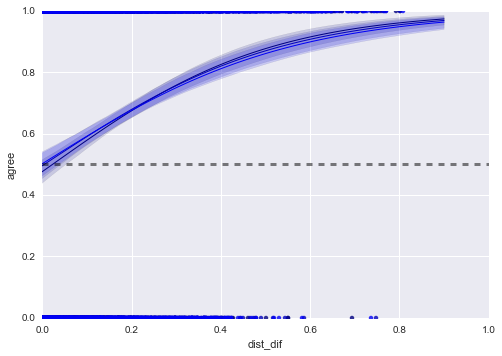

In [77]:
fig,ax = plt.subplots(1,1)

d='mf'
for i,k in enumerate(np.arange(130,151,10)):
    colorVal = scalarMap.to_rgba(i)
    artist_features = np.load("../GenreModeling/data/features/{}/features_{}.npy".format(d,k))
    def calc_dist(artist_a,artist_b):
        return cosine(artist_features[artist_a],artist_features[artist_b])

    eval_data['ab_dist'] = eval_data.apply(lambda row: calc_dist(row['artist_a'],row['artist_b']),axis=1)
    eval_data['ab_dist'] = eval_data.apply(lambda row: calc_dist(row['artist_a'],row['artist_b']),axis=1)
    eval_data['dist_dif'] = np.clip(np.abs(eval_data['ab_dist']-eval_data['bc_dist']),0,1)
    eval_data['agree'] = eval_data.apply(agree_parse,axis=1)

    seaborn.regplot(x='dist_dif',y='agree',data=eval_data,logistic=True,ax=ax,color=colorVal,line_kws={'lw':1}) # x_bins=bins,
ax.axhline(0.5,ls='--',alpha=0.5,c='k',lw=3)
ax.set_ylim(0,1.)

ax.set_xticks(bins)
ax.set_xlim(0,1)

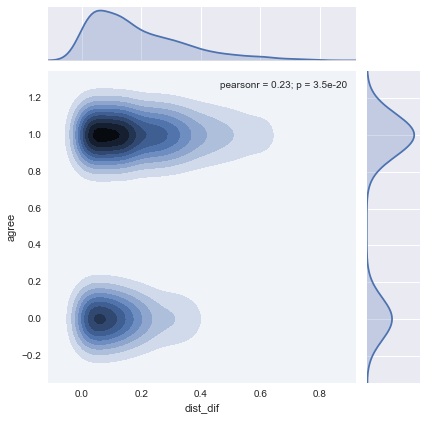

In [74]:
seaborn.jointplot(x='dist_dif',y='agree',data=eval_data,kind='kde')

In [73]:
seaborn.jointplot?